In [40]:
import wave
import pyaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt

# تنظیمات ضبط صوت
CHUNK = 1024  # تعداد نمونه ها در هر بلاک ضبط
FORMAT = pyaudio.paInt16  # دقت ضبط: 16 بیت
CHANNELS = 1  # تعداد کانال‌ها: 1 (مونو)
RATE = 16000  # فرکانس نمونه‌برداری: 16 کیلو هرتز
RECORD_SECONDS = 5  # مدت زمان ضبط (ثانیه)
OUTPUT_FILENAME = 'recorded_audio.wav'  # نام فایل خروجی

audio = pyaudio.PyAudio()

# ضبط صدا
stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

print("Recording...")

frames = []

# ضبط نمونه های صوتی
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Finished recording.")

# توقف و بستن ضبط کننده
stream.stop_stream()
stream.close()
audio.terminate()

# ذخیره فایل صوتی
wave_file = wave.open(OUTPUT_FILENAME, 'wb')
wave_file.setnchannels(CHANNELS)
wave_file.setsampwidth(audio.get_sample_size(FORMAT))
wave_file.setframerate(RATE)
wave_file.writeframes(b''.join(frames))
wave_file.close()

print("The audio file was successfully recorded and saved.")

Recording...
Finished recording.
The audio file was successfully recorded and saved.


In [41]:
# تنظیمات فریم بندی
FRAME_LENGTH = 0.03  # طول فریم (ثانیه)
FRAME_SHIFT = 0.01  # فریم شیفت (ثانیه)
SAMPLE_RATE = 16000  # فرکانس نمونه‌برداری: 16 کیلو هرتز

# خواندن فایل صوتی
audio_file = 'recorded_audio.wav'
audio, sr = librosa.load(audio_file, sr=SAMPLE_RATE, mono=True)

# تبدیل ثانیه به تعداد نمونه‌ها
frame_length = int(FRAME_LENGTH * SAMPLE_RATE)
frame_shift = int(FRAME_SHIFT * SAMPLE_RATE)

# فریم بندی گفتار
frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=frame_shift).T

# تعداد فریم‌ها
num_frames = frames.shape[0]

# نمایش اطلاعات فریم‌ها
# for i in range(num_frames):
#     print(f"Frame {i+1}:")
#     print(frames[i])

# تعداد کل فریم‌ها
print("تعداد کل فریم‌ها:", num_frames)

تعداد کل فریم‌ها: 497


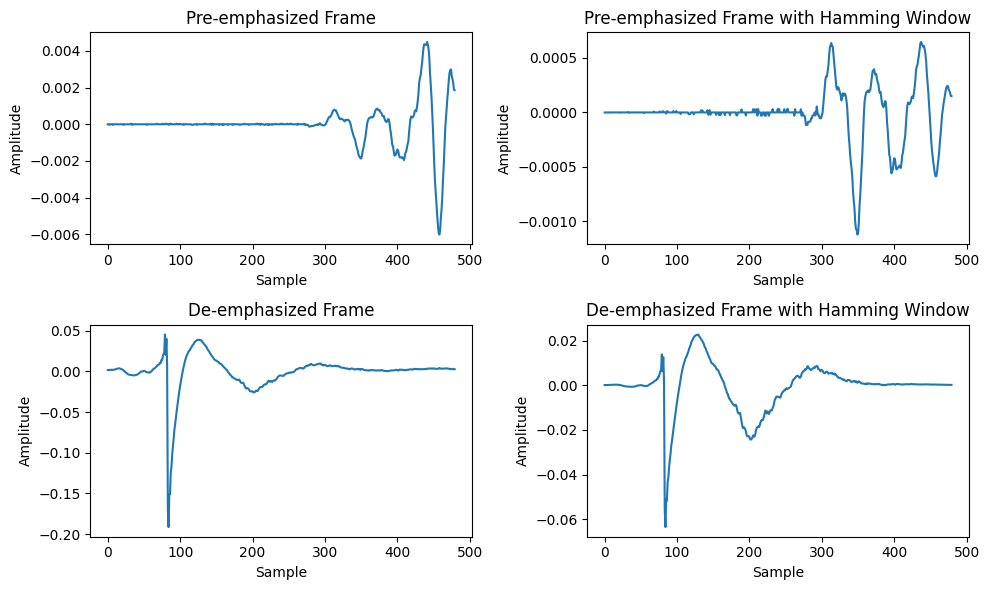

In [42]:
# انتخاب یک فریم واکدار و یک فریم بیواک
pre_emphasized_frame = audio[:frame_length]
de_emphasized_frame = audio[frame_length:frame_length * 2]

# اعمال پنجره همینگ
hamming_window = np.hamming(frame_length)
pre_emphasized_frame_hamming = pre_emphasized_frame * hamming_window
de_emphasized_frame_hamming = de_emphasized_frame * hamming_window

# اعمال پنجره مستطیلی
rectangular_window = np.ones(frame_length)
pre_emphasized_frame_rectangular = pre_emphasized_frame * rectangular_window
de_emphasized_frame_rectangular = de_emphasized_frame * rectangular_window

# رسم نتایج
plt.figure(figsize=(10, 6))

# فریم واکدار با پنجره همینگ
plt.subplot(2, 2, 1)
plt.plot(pre_emphasized_frame)
plt.title('Pre-emphasized Frame')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(pre_emphasized_frame_hamming)
plt.title('Pre-emphasized Frame with Hamming Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# فریم بیواک با پنجره همینگ
plt.subplot(2, 2, 3)
plt.plot(de_emphasized_frame)
plt.title('De-emphasized Frame')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(de_emphasized_frame_hamming)
plt.title('De-emphasized Frame with Hamming Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


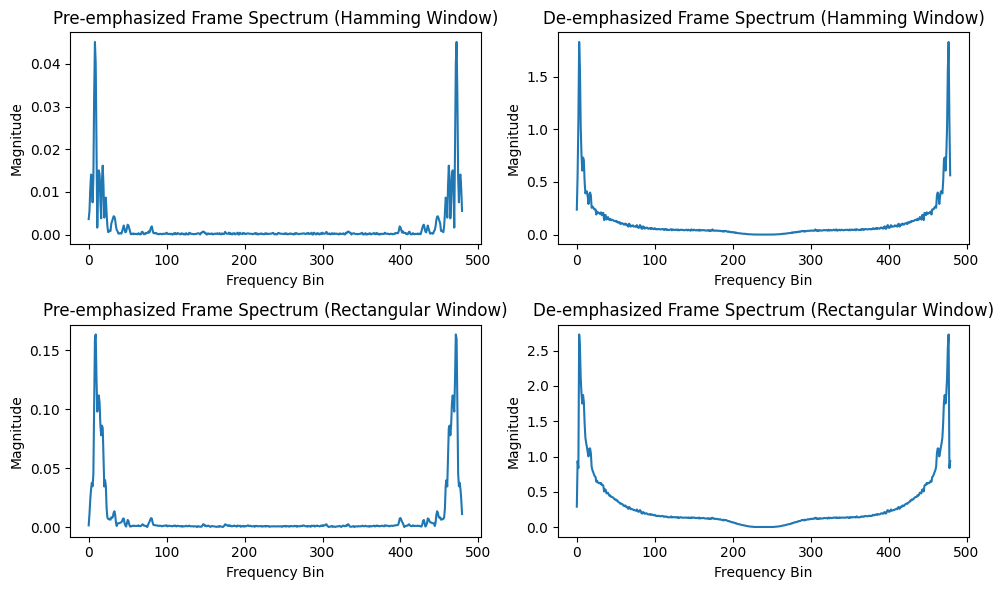

In [43]:
# محاسبه تبدیل فوریه
pre_emphasized_frame_spectrum_hamming = np.abs(np.fft.fft(pre_emphasized_frame * np.hamming(frame_length)))
de_emphasized_frame_spectrum_hamming = np.abs(np.fft.fft(de_emphasized_frame * np.hamming(frame_length)))

pre_emphasized_frame_spectrum_rectangular = np.abs(np.fft.fft(pre_emphasized_frame * np.ones(frame_length)))
de_emphasized_frame_spectrum_rectangular = np.abs(np.fft.fft(de_emphasized_frame * np.ones(frame_length)))

# رسم نمودارهای طیف فرکانسی
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(pre_emphasized_frame_spectrum_hamming)
plt.title('Pre-emphasized Frame Spectrum (Hamming Window)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 2)
plt.plot(de_emphasized_frame_spectrum_hamming)
plt.title('De-emphasized Frame Spectrum (Hamming Window)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 3)
plt.plot(pre_emphasized_frame_spectrum_rectangular)
plt.title('Pre-emphasized Frame Spectrum (Rectangular Window)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 4)
plt.plot(de_emphasized_frame_spectrum_rectangular)
plt.title('De-emphasized Frame Spectrum (Rectangular Window)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


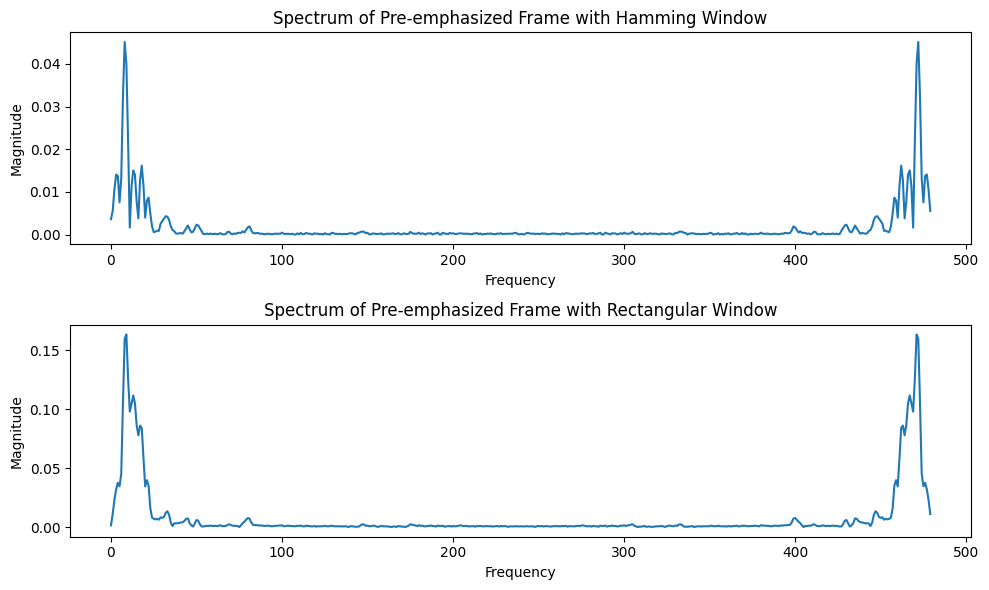

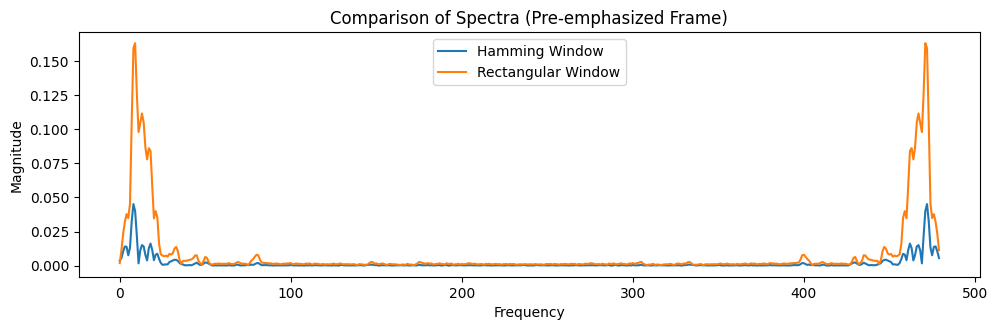

In [44]:
# محاسبه طیف فوریه با پنجره همینگ
pre_emphasized_spectrum = np.abs(np.fft.fft(pre_emphasized_frame_hamming))
# محاسبه طیف فوریه با پنجره مستطیلی
pre_emphasized_spectrum_rectangular = np.abs(np.fft.fft(pre_emphasized_frame_rectangular))

# رسم نمودارهای طیف فوریه
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(pre_emphasized_spectrum)
plt.title('Spectrum of Pre-emphasized Frame with Hamming Window')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(pre_emphasized_spectrum_rectangular)
plt.title('Spectrum of Pre-emphasized Frame with Rectangular Window')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()



# محاسبه طیف فوریه با پنجره همینگ
pre_emphasized_spectrum = np.abs(np.fft.fft(pre_emphasized_frame_hamming))
# محاسبه طیف فوریه با پنجره مستطیلی
pre_emphasized_spectrum_rectangular = np.abs(np.fft.fft(pre_emphasized_frame_rectangular))

# رسم نمودارهای طیف فوریه
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(pre_emphasized_spectrum, label='Hamming Window')
plt.plot(pre_emphasized_spectrum_rectangular, label='Rectangular Window')
plt.title('Comparison of Spectra (Pre-emphasized Frame)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()


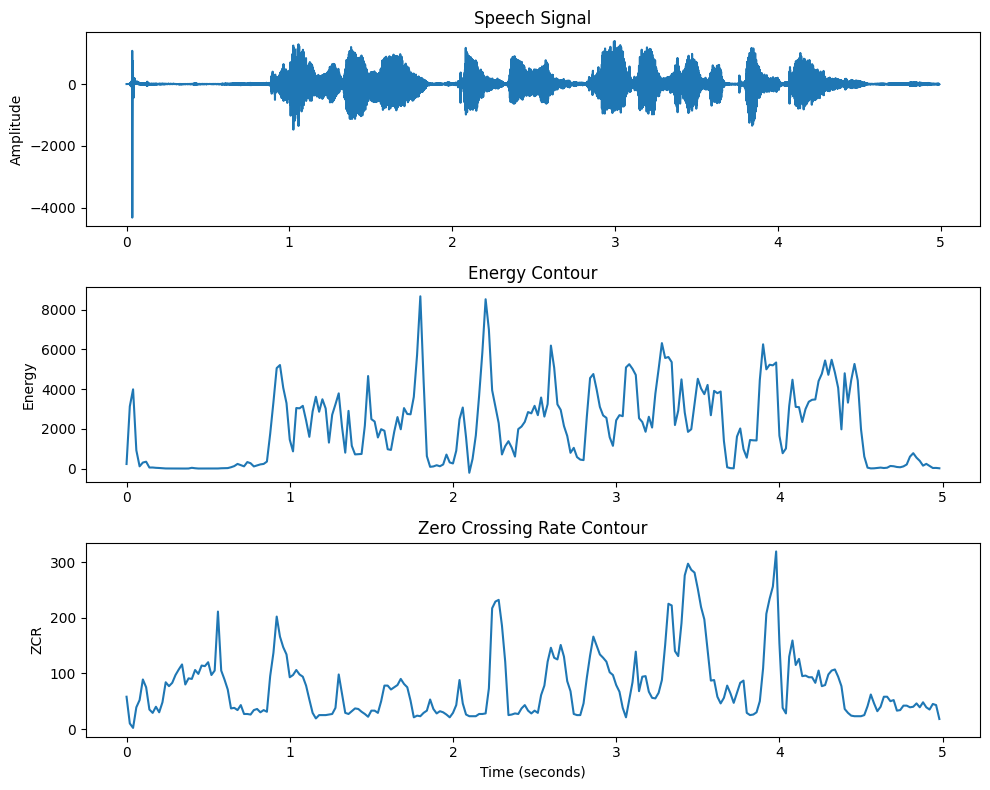

C:\Users\Zahra\AppData\Local\Temp\ipykernel_19956\393140210.py:64: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


TypeError: ContourPlot() missing 1 required positional argument: 'framerate'

In [49]:
import math
import numpy as np
import pylab as pl
import wave

def ZeroCR(waveData, frameSize, overLap):
    wlen = len(waveData)
    step = frameSize - overLap
    frameNum = math.ceil(wlen/step)
    zcr = np.zeros((frameNum,1))
    for i in range(frameNum):
        curFrame = waveData[np.arange(i*step, min(i*step + frameSize, wlen))]
        curFrame = curFrame - np.mean(curFrame)
        zcr[i] = sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr

def Energy(waveData, frameSize, overLap):
    wlen = len(waveData)
    step = frameSize - overLap
    frameNum = math.ceil(wlen / step)
    energy = np.zeros((frameNum, 1))
    for i in range(frameNum):
        curFrame = waveData[np.arange(i * step, min(i * step + frameSize, wlen))]
        energy[i] = np.sum(curFrame ** 2) / frameSize
    return energy

def ContourPlot(waveData, energy, zcr, frameSize, overLap, framerate):
    wlen = len(waveData)
    step = frameSize - overLap
    frameNum = math.ceil(wlen / step)
    time = np.arange(frameNum) * step / framerate

    plt.figure(figsize=(10, 8))

    plt.subplot(3, 1, 1)
    plt.plot(np.arange(wlen) / framerate, waveData)
    plt.ylabel('Amplitude')
    plt.title('Speech Signal')

    plt.subplot(3, 1, 2)
    plt.plot(time, energy)
    plt.ylabel('Energy')
    plt.title('Energy Contour')

    plt.subplot(3, 1, 3)
    plt.plot(time, zcr)
    plt.xlabel('Time (seconds)')
    plt.ylabel('ZCR')
    plt.title('Zero Crossing Rate Contour')

    plt.tight_layout()
    plt.show()

zcr = ZeroCR(wave_data, frame_length, frame_shift)
energy = Energy(wave_data, frame_length, frame_shift)
ContourPlot(wave_data, energy, zcr, frame_length, frame_shift, SAMPLE_RATE)

# خواندن فایل صوتی
audio_file = 'recorded_audio.wav'
fw = wave.open(audio_file)
params = fw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = fw.readframes(nframes)
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 1
fw.close()

# تبدیل ثانیه به تعداد نمونه‌ها
frame_length = int(FRAME_LENGTH * framerate)
frame_shift = int(FRAME_SHIFT * framerate)

# محاسبه نرخ عبور از صفر برای هر فریم
zcr = ZeroCR(wave_data, frame_length, frame_shift)

# محاسبه انرژی برای هر فریم
energy = Energy(wave_data, frame_length, frame_shift)

# رسم کانتور انرژی و نرخ عبور از صفر و سیگنال گفتار
ContourPlot(energy, zcr, frame_length, frame_shift, framerate)
